<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
# boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

# Define the local file path\n
file_path = r'C:\\Users\\A200082713\\ai_my_jupyter\\data\\boston_housing.csv'
# Load the CSV file into a DataFrame\n,
boston_df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame\n",
print(boston_df.head())





   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


#### Add your code below following the instructions given in the course to complete the peer graded assignment


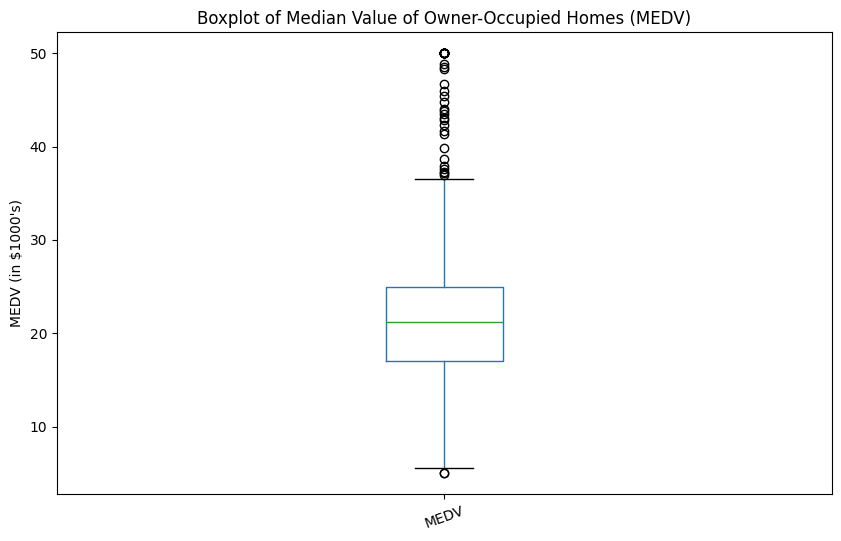

In [ ]:
# Create the box plot for MEDV pyplot.bar

pyplot.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', grid=False)
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.suptitle("")  # Remove the default title
pyplot.ylabel("MEDV (in $1000's)")
pyplot.xticks(rotation=20)
pyplot.show()

# Explanation: the boxplot shows the median value around 23 (line in the box) and the box itselfs shows the range of MEDV between 25th (around 5) and 75th percentile (around 38).

In [ ]:
# 1.	Is there a significant difference in the median value of houses bounded by the Charles river or not?
# Graphical representation: As a first step create 2 groups of houses, bound and not bound
boston_bound_df=boston_df[boston_df['CHAS']==1]
boston_unbound_df=boston_df[boston_df['CHAS']==0]

print(len(boston_bound_df))

35


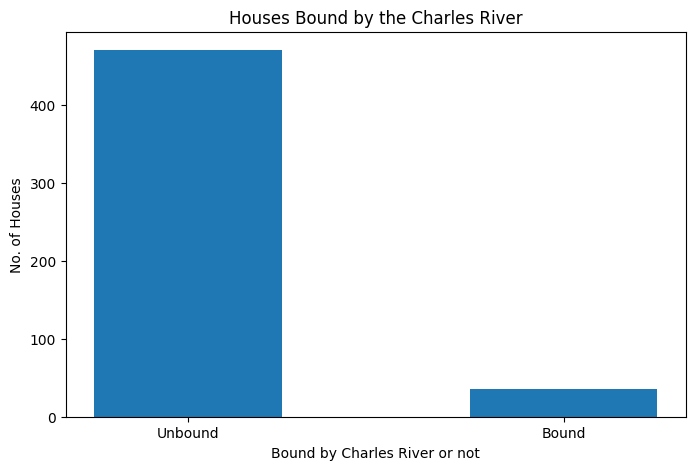

In [ ]:
# Create the bar plot for the houses either bound (1) or unbound (0) using pyplot.bar
chas_counts = boston_df['CHAS'].value_counts()

# Create a bar plot
pyplot.figure(figsize=(8, 5))
pyplot.bar(chas_counts.index, chas_counts.values, tick_label=["Unbound", "Bound"], width=0.5)
pyplot.title("Houses Bound by the Charles River")
pyplot.xlabel("Bound by Charles River or not")
pyplot.ylabel("No. of Houses")
pyplot.show()

# Explanation: The bar chart clearly shows that the majority of the houses is unbound by the river. 

In [ ]:

# Is there a significant difference in the median value of houses bounded by the Charles river or not?
# we need to test if the median values are statistically different for the bound / unbound houses.
# H0: the median value of owner-occupied homes for bound houses is NOT different from the median value of unbound houses
# Ha: the median value of owner-occupied homes for bound houses is different from the median value of unbound houses
# We will first use levene test to see if the variances are the same, if so, we can proceed with the TTest

#Levene's test. H0: the variances of the two groups are different
outlevene=scipy.stats.levene(boston_bound_df['MEDV'],
                   boston_unbound_df['MEDV'], center='mean')

# since the p-value is smaller than 0.05: we can reject the H0 and assume non-equality of variance
print(f'Levene:{outlevene}')

#TTest. # H0: the median value of owner-occupied homes for bound houses is NOT different from the median value of unbound houses

outttest=scipy.stats.ttest_ind(boston_bound_df['MEDV'],
                   boston_unbound_df['MEDV'],  equal_var = False)

# since the p-value is smaller than 0.05 we must reject the H0 and the medium value of the houses is different for bound and unbound houses

print(f'Ttest:{outttest}')

Levene:LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))
Ttest:TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))


age group: <35 yrs, MEDV values:
 91
age group: 35 - 70 yrs, MEDV values:
 128
age group: >70 yrs, MEDV values:
 287


<Figure size 1000x600 with 0 Axes>

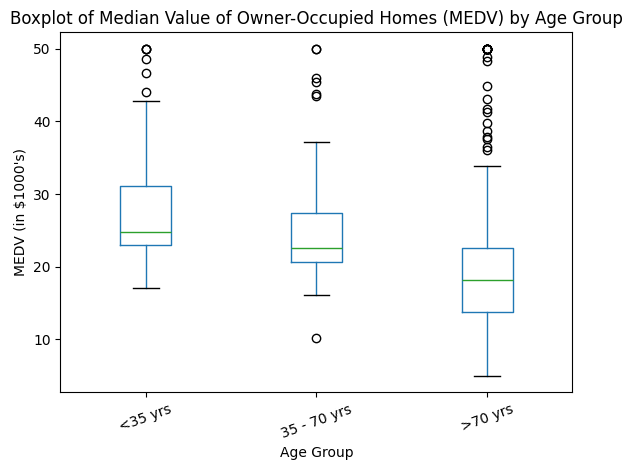

In [ ]:
# 2.	Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
# Graphical representation:  boxplot for the MEDV variable vs the AGE variable. We first need to create 3 groups based upon ages.

boston_age_bins = [0, 35, 70, 100]
boston_age_labels = ["<35 yrs", "35 - 70 yrs", ">70 yrs"]
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=boston_age_bins, labels=boston_age_labels)
for bos_lab in boston_age_labels:
    print(f"age group: {bos_lab}, MEDV values:\n", len(boston_df[boston_df['AGE_group'] == bos_lab]['MEDV']))
pyplot.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='AGE_group', grid=False)
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV) by Age Group")
pyplot.suptitle("")  # Remove the default title
pyplot.xlabel("Age Group")
pyplot.ylabel("MEDV (in $1000's)")
pyplot.xticks(rotation=20)
pyplot.show()

Explanation: the box chart shows that the age group > 70 lives in cheaper houses than the younger groups. 

In [ ]:

# Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
# Use ANOVA to test if there is a significant difference in median values between  3 groups
# first we use levine to verify the variances are not too different
# H0: The median value of owner-occupied homes is NOT different for proportions of owner occupied units built prior to 1940.
# Ha: The median value of owner-occupied homes is different for proportions of owner occupied units built prior to 1940.
# use the groups as suggested for the box plot excercise 


group_35 = boston_df[boston_df['AGE_group'] == "<35 yrs"]['MEDV']
group_35_70 = boston_df[boston_df['AGE_group'] == "35 - 70 yrs"]['MEDV']
group_70 = boston_df[boston_df['AGE_group'] == ">70 yrs"]['MEDV']


print(len(group_66))

# We will first use levene test to see if the variances are the same, if so, we can proceed with the TTest
# Levene's test. H0: the variances of the two groups are different
outlevene = scipy.stats.levene(group_35, group_35_70, group_70)

print(f'Levene:{outlevene}')

# Now we can continue with ANOVA as the p value from the Levene test is <0.05 thus rejecting the H0 and assuming the variances are not different
# H0: The median value of owner-occupied homes is NOT different for proportions of owner occupied units built prior to 1940.
# Ha: The median value of owner-occupied homes is different for proportions of owner occupied units built prior to 1940.
outanova=scipy.stats.f_oneway(group_35, group_35_70, group_70)

print(f'ANOVA:{outanova}')

# As the p-value is very small, we can reject the H0 and conclude that the median value of owner-occupied homes is indeed different for proportions of owner occupied units built prior to 1940.

168
Levene:LeveneResult(statistic=np.float64(3.471820890881101), pvalue=np.float64(0.031806778061338456))
ANOVA:F_onewayResult(statistic=np.float64(36.40764999196599), pvalue=np.float64(1.7105011022702984e-15))


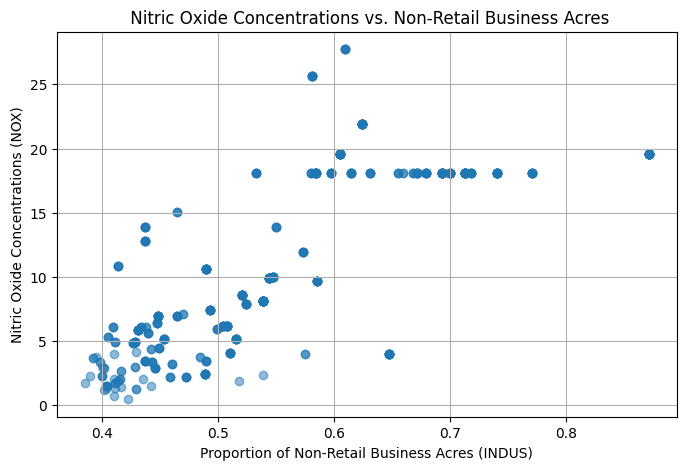

In [57]:
# 3.	Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
# Visualization: scatter plot for NOX vs. INDUS
pyplot.figure(figsize=(8,5))

pyplot.scatter(boston_df['NOX'],boston_df['INDUS'],alpha=0.5)
pyplot.title(" Nitric Oxide Concentrations vs. Non-Retail Business Acres")
pyplot.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.ylabel("Nitric Oxide Concentrations (NOX)")
pyplot.grid(True)
pyplot.show()

# from the scatterplot, a strong correlation is actually visible, we will statistically test it

In [ ]:
# 3.	Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
# We can use correlation test for 2 continuous variables. This is the Pearson test. 
# H0 There is NO statistical relationship between NOX and the proportion of non-retail business acres per town. This would show a correlation coefficient of 0.
# Ha There is a statistical relationship between NOX and the proportion of non-retail business acres per town. This would show a correlation coefficient different from 0.

outpearson=scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

print(f'Outpearson:{outpearson}')
# in fact, the p-value is extremely low, so, the H0 can be rejected and there is a strong positive correlation

Outpearson:PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))


In [ ]:
# 4.	What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
# Using regression, we will fit a function for y (dependent variable, the Median Value) to x as the input (Distance)
# H0: There is no effect or impact of the distance on the median value
# Ha: There is an effect or impact of the distance on the median value
# for x use DIS, for y use MEDV

x=boston_df['DIS']
y=boston_df['MEDV']
# add the intercept or beta_0 
x_plus_intercept=sm.add_constant(x)

model = sm.OLS(y, x_plus_intercept).fit()
predictions = model.predict(x_plus_intercept)

# Print out the statistics
model.summary()
# the p-value is very small, we can reject the H0 and assume a correlation
# the value for x=0 is 18.3901 which is the median value of the house when the distance is 0
# r-squared is 0.062 which is rather low and means that the influence of DIS on MEDV is rather low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        16:55:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

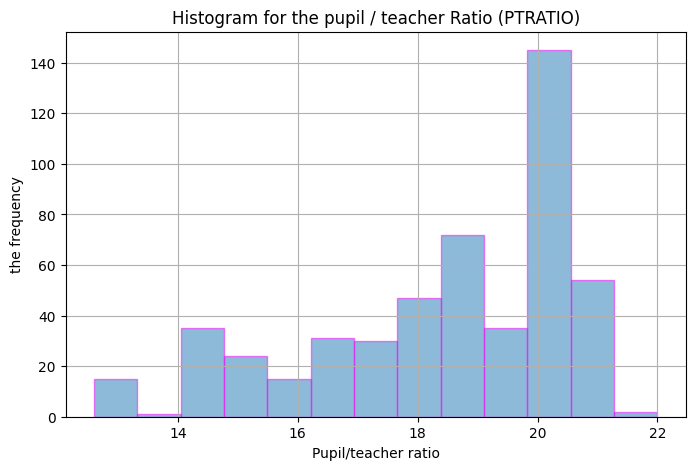

In [ ]:
# Vizualization: a histogram for the pupil to teacher ratio variable PTRATIO

pyplot.figure(figsize=(8,5))

pyplot.hist(boston_df['PTRATIO'], bins=13, edgecolor='magenta', alpha=0.5)
pyplot.title("Histogram for the pupil / teacher Ratio (PTRATIO)")
pyplot.xlabel("Pupil/teacher ratio")
pyplot.ylabel("the frequency")
pyplot.grid(True)
pyplot.show()

#Explanation: this shows how the pupil to teacher rate is distributed with a maximum ratio at about 20